<a href="https://colab.research.google.com/github/Luke-zm/ev_charge_ana/blob/zm/Copy_of_ev_charging_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis on "duration_hr"
----
A very interesting question to ask will be "How long are the ev users expected to stay at the charging station?"  
This analysis can help to identify some user behaviour and make some suggestions to owners of the charging station.  

We start by importing the necessary libraries.  

In [ ]:
# Import the necessary packages for EDA
import pandas as pd
# Set option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# Import datetime for datetime processing
from datetime import datetime, timedelta

In [ ]:
# Import the CSV file to work with
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/yy/data/output.csv"
df = pd.read_csv(url)
df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
3,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning
4,377434,14Q3User 44,70204,1,2014-12-18,08:36,2014-12-18,16:56,7.15,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 08:36:00,2014-12-18 16:56:00,8.333333,Thursday,Thursday,morning,afternoon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22537 entries, 0 to 22536
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   charging_event_id  22537 non-null  int64  
 1   user_id            22537 non-null  object 
 2   cp_id              22537 non-null  int64  
 3   con_num            22537 non-null  int64  
 4   start_date         22537 non-null  object 
 5   start_time         22537 non-null  object 
 6   end_date           22537 non-null  object 
 7   end_time           22537 non-null  object 
 8   total_kwh          22537 non-null  float64
 9   site               22537 non-null  object 
 10  charger_model      22537 non-null  object 
 11  start_datetime     22537 non-null  object 
 12  end_datetime       22537 non-null  object 
 13  duration_hr        22537 non-null  float64
 14  start_day          22537 non-null  object 
 15  end_day            22537 non-null  object 
 16  start_period       225

In [ ]:
len(df["charging_event_id"].unique())

22537

In [ ]:
len(df["user_id"].unique())

1833

In [ ]:
df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot'], dtype=object)

In [ ]:
df["charger_model"].unique()

array(['APT 7kW Dual Outlet', 'APT Triple Rapid Charger',
       'APT 7kW (Powershare)'], dtype=object)

In [ ]:
df["con_num"].unique()

array([2, 1])

From some simple observations, we can say that currently there are 22k independent charging events.  
Out of these events, there are 1833 unique users.  
There are 3 types of chargers currently.  
All chargers have 1 or 2 connectors.  
Note that even if the user id the same across years, they are considered as 2 unique users.  
This is becasue the actual data is messy, given how we have to change the datetime format and such.  
We have no way of knowing if it is really the same user across the different years.   

In [ ]:
# Change the relavent columns to datetime format
df[["start_datetime", "end_datetime"]] = df[["start_datetime", "end_datetime"]].apply(pd.to_datetime, yearfirst=True, format="%Y-%m-%d %H:%M:%S")

Drop test site.

In [ ]:
df = df[~df['site'].str.contains('test site', case=False)]
df.reset_index(drop=True, inplace=True)
df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot'], dtype=object)

1. Find the number of days with active users.  
2. Find the number of user per time period for weekdays and weekends.  

In [ ]:
weekdays = ['Wednesday', 'Tuesday', 'Thursday', 'Friday', 'Monday']
df_weekday = df.loc[df['start_day'].isin(weekdays)]
df_weekday.shape

(19306, 18)

In [ ]:
df_weekend = df.loc[df['start_day'].isin(['Saturday', 'Sunday'])]
df_weekend.shape

(3231, 18)

In [ ]:
df.groupby("start_day").count()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,end_day,start_period,end_period
start_day,,,,,,,,,,,,,,,,,
Friday,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527,3527
Monday,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642
Saturday,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414
Sunday,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817,817
Thursday,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115
Tuesday,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943
Wednesday,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079,4079


In [ ]:
user_frequency = df.groupby('user_id').size().reset_index(name='usage_count')
df = df.merge(user_frequency, on='user_id', how='left')

## Breaking down of datetime feature
----
Datetime object is needed for computation, but math models and machine learning algorithms doesn't understand time.   
We have a few choices.  
1. Try to treat the problem as a time series problem.  
2. Try to treat these time stamps as individual features.  

To treat the time as individual features, we need to extract out the information possibily contained in a timestamp, that can somehow be correlated to the duration of stay of the customer.  

In [ ]:
# These information need to be extracted out to be used as features
# in a decision tree model that I plan to use.
# Extract year from start_datetime column
df['year'] = df['start_datetime'].dt.year
# Extract the quarter
df['start_quarter'] = df['start_datetime'].dt.quarter
# Extract the start month
df['start_month'] = df['start_datetime'].dt.month
# Extract the start day
df['start_day_of_month'] = df['start_datetime'].dt.day
# Extract the start hours
df['start_hour'] = df['start_datetime'].dt.hour
# Extract the start minutes
df['start_minute'] = df['start_datetime'].dt.minute
# Classify if the start time is on weekday or weekend
df['start_on_weekday'] = df['start_day'].apply(lambda x: 1 if x in weekdays else 0)

In [ ]:
# Group by the year
df.groupby('year').size()

year
2014      78
2015     397
2016    2325
2017    4205
2018    4161
2019    7006
2020    3381
2021     984
dtype: int64

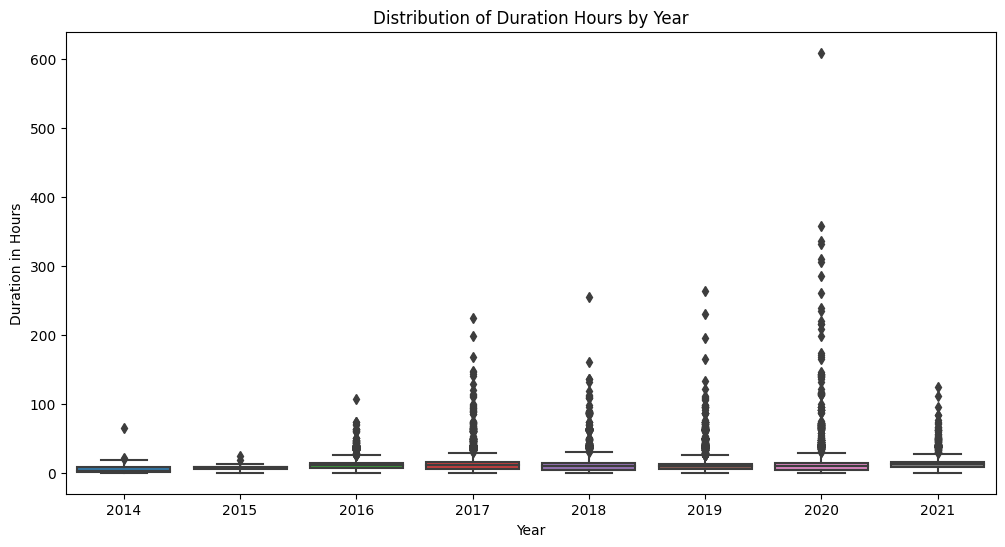

In [ ]:
# Creating the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='duration_hr', data=df)
# Labeling the axes
plt.xlabel('Year')
plt.ylabel('Duration in Hours')
# Set a title
plt.title('Distribution of Duration Hours by Year')
plt.show()

We can see that the data is heavily affected by outliers.
This means that we will have to remove these outliers.  

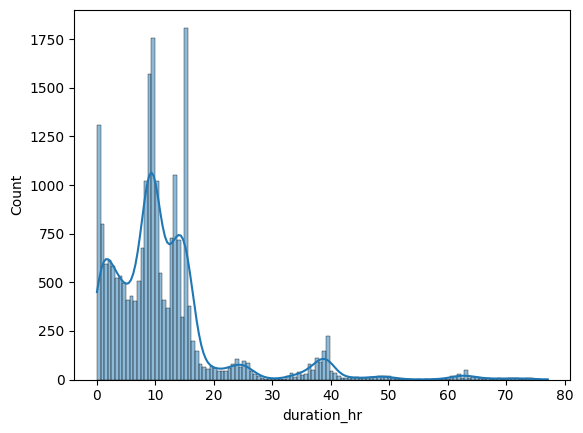

In [ ]:
sns.histplot(df.duration_hr.loc[df.duration_hr < 80], kde=True);

Extremely right skewed.   
Need to drop the extreme large values.  
This is becasue the variation is extremely large.   
Standard Scaler wont save it...

In [ ]:
# Drop duration less than 0.25 hrs.
# This is because duration below 0.25 hours are very small values.
# Drop duration more than 24 hrs.
# This is just hogging the charging station and really shouldn't be entertained
df = df.loc[(df['duration_hr'] >= 0.25) & (df['duration_hr'] <= 24)]

In [ ]:
# Calculate Q1, Q3 and IQR
Q1 = df['duration_hr'].quantile(0.25)
Q3 = df['duration_hr'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df.loc[(df['duration_hr'] >= lower_bound) & (df['duration_hr'] <= upper_bound)]

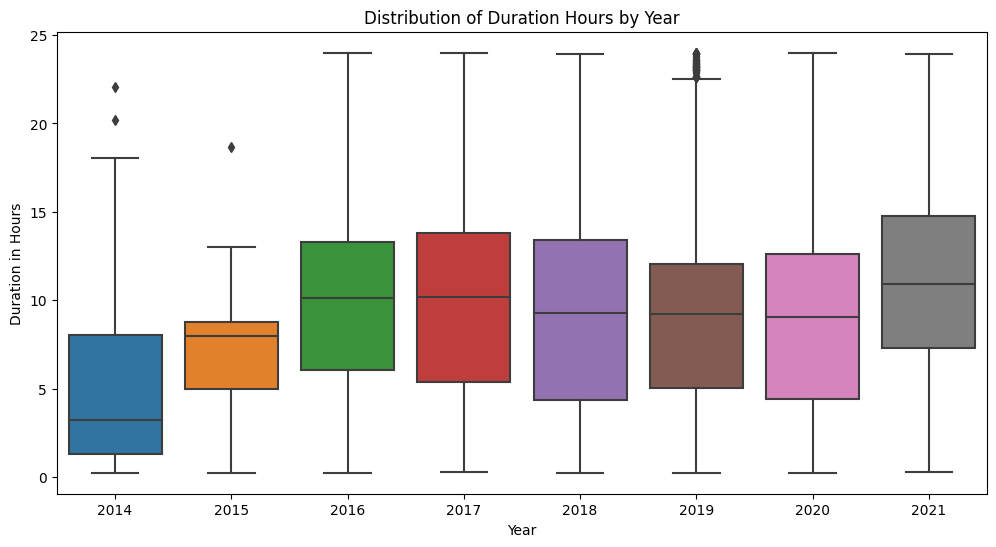

In [ ]:
# Creating the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='duration_hr', data=df)
# Labeling the axes
plt.xlabel('Year')
plt.ylabel('Duration in Hours')
# Set a title
plt.title('Distribution of Duration Hours by Year')
plt.show()

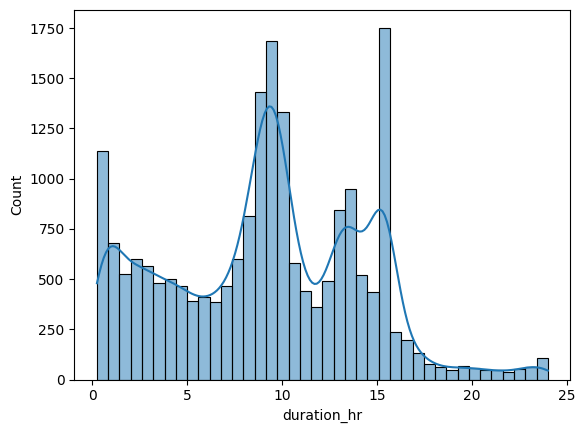

In [ ]:
sns.histplot(df.duration_hr, kde=True);

After dropping off the extreme values, the range is now much better.  

In [ ]:
# Get a subset of 2014 at Torre Road to use as test case
df_2014 = df.loc[df['start_datetime'].dt.year < 2015]
df_2014.tail()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,usage_count,year,start_quarter,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday
6627,243750,14Q2User 17,70202,1,2014-05-12,15:55,2014-05-12,17:27,5.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-12 15:55:00,2014-05-12 17:27:00,1.533333,Monday,Monday,afternoon,afternoon,1,2014,2,5,12,15,55,1
6628,243232,14Q2User 11,70202,1,2014-05-10,10:18,2014-05-10,11:04,1.26,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-10 10:18:00,2014-05-10 11:04:00,0.766667,Saturday,Saturday,morning,morning,2,2014,2,5,10,10,18,0
6629,236159,14Q2User 15,70204,2,2014-04-18,08:41,2014-04-18,18:11,4.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-18 08:41:00,2014-04-18 18:11:00,9.500000,Friday,Friday,morning,evening,3,2014,2,4,18,8,41,1
6630,234600,14Q2User 15,70204,2,2014-04-12,11:55,2014-04-12,21:12,5.39,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-12 11:55:00,2014-04-12 21:12:00,9.283333,Saturday,Saturday,morning,evening,3,2014,2,4,12,11,55,0
6631,233978,14Q2User 15,70204,2,2014-04-10,07:41,2014-04-10,17:12,5.63,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-10 07:41:00,2014-04-10 17:12:00,9.516667,Thursday,Thursday,morning,afternoon,3,2014,2,4,10,7,41,1


In [ ]:
df_2014.site.unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park'],
      dtype=object)

In [ ]:
df_2014_woodhouse = df_2014.loc[df_2014["site"]=='Woodhouse Lane Car Park']
df_2014_woodhouse.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,usage_count,year,start_quarter,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday
3,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning,1,2014,4,12,18,9,29,1
4,377434,14Q3User 44,70204,1,2014-12-18,08:36,2014-12-18,16:56,7.15,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 08:36:00,2014-12-18 16:56:00,8.333333,Thursday,Thursday,morning,afternoon,9,2014,4,12,18,8,36,1
5,376244,14Q3User 51,70204,1,2014-12-16,14:30,2014-12-16,18:16,8.44,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-16 14:30:00,2014-12-16 18:16:00,3.766667,Tuesday,Tuesday,afternoon,evening,1,2014,4,12,16,14,30,1
6,375881,14Q3User 44,70203,2,2014-12-16,07:52,2014-12-16,16:00,8.76,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-16 07:52:00,2014-12-16 16:00:00,8.133333,Tuesday,Tuesday,morning,afternoon,9,2014,4,12,16,7,52,1
7,361804,14Q3User 44,70203,1,2014-12-11,16:48,2014-12-11,19:57,5.77,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-11 16:48:00,2014-12-11 19:57:00,3.150000,Thursday,Thursday,afternoon,evening,9,2014,4,12,11,16,48,1


In [ ]:
def get_unique_users_per_timeslot(df, timestep_in_hrs=6):
    """
    Counts unique users for each specified time interval in the provided DataFrame.

    This function takes in a DataFrame with user sessions and returns the count of unique
    users for each time interval (specified by `timestep_in_hrs`) the sessions span.

    Args:
        df (pd.DataFrame): Input DataFrame containing user sessions. It must have at least
            the following columns: 'start_datetime', 'end_datetime', and 'user_id'.
        timestep_in_hrs (float): The size of the time interval for which the unique user count
            should be aggregated, specified in hours. For example, a value of 0.5 represents
            a 30-minute interval.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'time_slot', which represents the start
            time of each time interval, and 'unique_users', which gives the count of unique
            users for that interval.

    Example:
        >>> df = pd.DataFrame({
        ...     'start_datetime': ['2021-01-01 08:00', '2021-01-01 08:10', '2021-01-01 09:00'],
        ...     'end_datetime': ['2021-01-01 08:15', '2021-01-01 08:45', '2021-01-01 09:30'],
        ...     'user_id': [1, 2, 2]})
        >>> get_unique_users_per_timeslot(df, 0.25)
           time_slot  unique_users
        0 2021-01-01 08:00:00             2
        1 2021-01-01 08:15:00             1
        2 2021-01-01 08:30:00             1
        3 2021-01-01 08:45:00             0
        4 2021-01-01 09:00:00             1
        5 2021-01-01 09:15:00             1
    """
    # Convert start_datetime and end_datetime to datetime objects
    df['start_datetime'] = pd.to_datetime(df['start_datetime'])
    df['end_datetime'] = pd.to_datetime(df['end_datetime'])

    # Calculate the timestep in minutes for further use
    timestep_in_minutes = int(timestep_in_hrs * 60)

    # Create a list to store the expanded rows
    expanded_rows = []

    # For each row, expand it into multiple rows for each timestep interval it spans
    for _, row in df.iterrows():
        # Get the start and end times of the current session
        start, end = row['start_datetime'], row['end_datetime']
        while start < end:
            next_end = min(start + timedelta(minutes=timestep_in_minutes), end)
            new_row = row.copy()
            new_row['start_datetime'] = start
            new_row['end_datetime'] = next_end
            expanded_rows.append(new_row)
            start = next_end

    # Convert the list of expanded rows back into a DataFrame
    expanded_df = pd.DataFrame(expanded_rows)

    # Generate a complete list of time slots
    min_time = df['start_datetime'].min().floor(f'{timestep_in_minutes}T')
    max_time = df['end_datetime'].max().ceil(f'{timestep_in_minutes}T')
    all_time_slots = pd.date_range(min_time, max_time, freq=f'{timestep_in_minutes}T')

    # For each timestep interval, count the unique user_ids
    expanded_df['time_slot'] = expanded_df['start_datetime'].dt.floor(f'{timestep_in_minutes}T')
    result_df = expanded_df.groupby('time_slot')['user_id'].nunique().reindex(all_time_slots).fillna(0).reset_index()
    result_df.columns = ['time_slot', 'unique_users']

    return result_df


Change the function so it is able to set the time period also apart from fixed time interval.  

In [ ]:
res_df = get_unique_users_per_timeslot(df_2014_woodhouse.copy(deep=True), timestep_in_hrs=168)

In [ ]:
res_df.head()

,time_slot,unique_users
0,2014-04-10,1.0
1,2014-04-17,1.0
2,2014-04-24,0.0
3,2014-05-01,0.0
4,2014-05-08,2.0


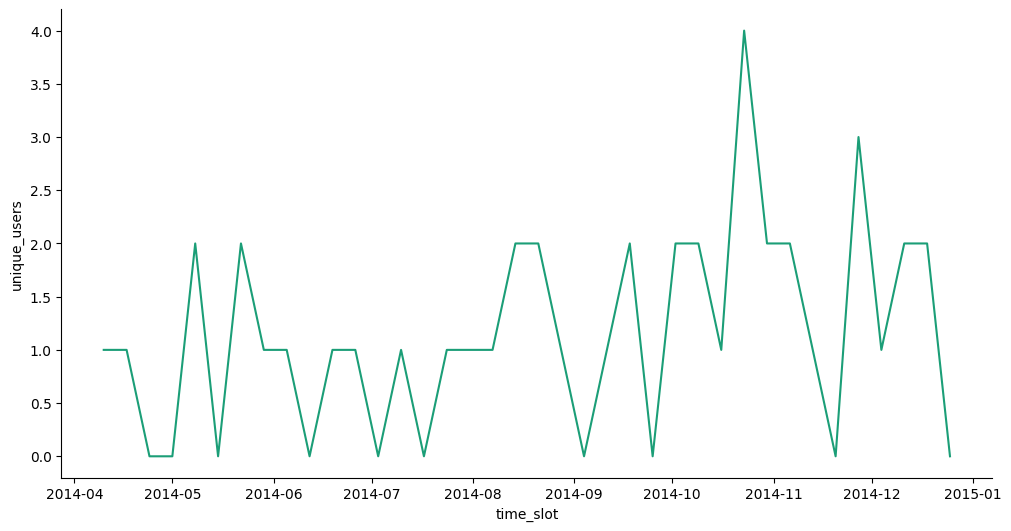

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_slot']
  ys = series['unique_users']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

In [ ]:
res_df = get_unique_users_per_timeslot(df_2014_woodhouse.copy(deep=True), timestep_in_hrs=24)

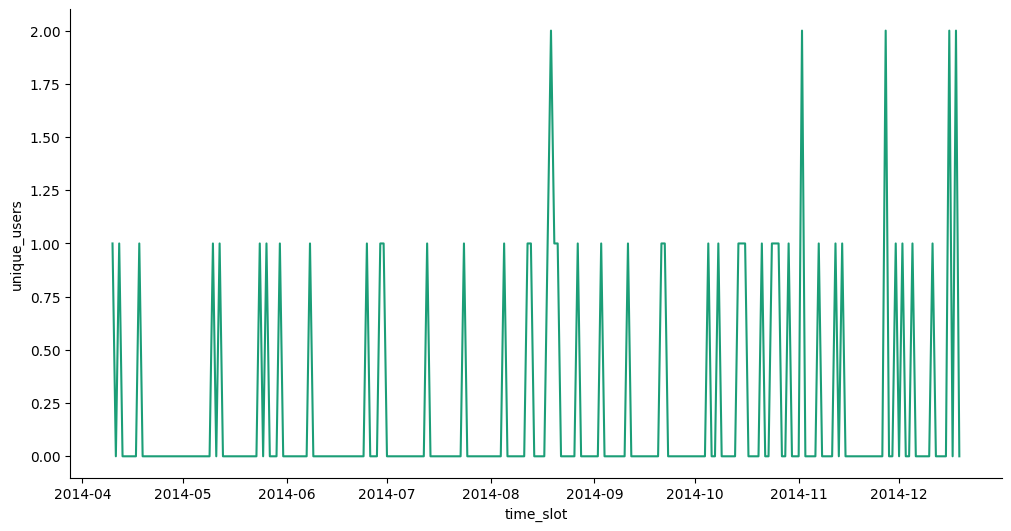

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

This shows that if we would like to treat this a time series analysis, then the data is too sparse to be of any use to us.  
If we take very long hours, then it is meaningless in real life, because number of customers at such long time interval is not useful.  
If we use shorter timings, then data is simply too sparse to provide any useful insights.  
This is because all the signals are basically spikes in time.  
This rule out the possibility of using time series data to predict on number of customers.  

In [ ]:
def count_simultaneous_chargers(row, df):
    # Select events at the same site.
    same_site_events = df[df['site'] == row['site']]

    # Count events where the time period overlaps with the current event's period.
    overlap_count = same_site_events[
        (same_site_events['start_datetime'] < row['end_datetime']) &
        (same_site_events['end_datetime'] > row['start_datetime'])
    ].shape[0]

    # Subtract 1 to exclude the current event from its own count.
    return overlap_count - 1

In [ ]:
# Ensure that the DataFrame is sorted by start_datetime.
df = df.sort_values(by='start_datetime')
# Apply the function to each row
df['simultaneous_users'] = df.apply(lambda row: count_simultaneous_chargers(row, df), axis=1)

In [ ]:
df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,usage_count,year,start_quarter,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday,simultaneous_users
6631,233978,14Q2User 15,70204,2,2014-04-10,07:41,2014-04-10,17:12,5.63,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-10 07:41:00,2014-04-10 17:12:00,9.516667,Thursday,Thursday,morning,afternoon,3,2014,2,4,10,7,41,1,0
6630,234600,14Q2User 15,70204,2,2014-04-12,11:55,2014-04-12,21:12,5.39,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-12 11:55:00,2014-04-12 21:12:00,9.283333,Saturday,Saturday,morning,evening,3,2014,2,4,12,11,55,0,0
6629,236159,14Q2User 15,70204,2,2014-04-18,08:41,2014-04-18,18:11,4.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-18 08:41:00,2014-04-18 18:11:00,9.500000,Friday,Friday,morning,evening,3,2014,2,4,18,8,41,1,0
6628,243232,14Q2User 11,70202,1,2014-05-10,10:18,2014-05-10,11:04,1.26,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-10 10:18:00,2014-05-10 11:04:00,0.766667,Saturday,Saturday,morning,morning,2,2014,2,5,10,10,18,0,0
6627,243750,14Q2User 17,70202,1,2014-05-12,15:55,2014-05-12,17:27,5.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-12 15:55:00,2014-05-12 17:27:00,1.533333,Monday,Monday,afternoon,afternoon,1,2014,2,5,12,15,55,1,0


Examine what are the distribution of the arrival duration for those who arrive on different years, quaters, days and start periods.

In [ ]:
def plot_ev_distribution(data, y_axis, category, qq_dist='norm', **kwargs):
    """
    Plot box plots, optional QQ plots, and bar chart with KDE for a specified variable based on a given category.

    Args:
    - data (pd.DataFrame): DataFrame containing the data.
    - y_axis (str): Column name from DataFrame representing the variable of interest for plotting.
    - category (str): Column name from DataFrame to categorize the data. Options are:
      'start_day', 'start_period', 'frequency', 'start_quarter', 'start_hour'.
    - qq_dist (str, optional): Theoretical distribution to use in QQ plot. Default is 'norm' for normal distribution.
    - **kwargs:
        - qqplot (bool, optional): If True, a QQ plot will be shown. Default is False.

    Returns:
    - Matplotlib figure with subplots of box plot, optional QQ plot, and bar chart with KDE. If qqplot is set to True,
      the figure will contain three subplots including the QQ plot. Otherwise, only the box plot and bar chart with KDE will be shown.

    Raises:
    - ValueError: If the provided category is not one of the recognized options.
    """
    # Validate category
    if category not in ['start_day', 'start_period', 'frequency', 'start_quarter',
                        'start_hour', 'con_num', 'site', 'charger_model',
                        'start_on_weekday',	'simultaneous_users']:
        raise ValueError("Category not recognized.")

    # Setup figure for plots based on whether QQ plot is needed or not
    if kwargs.get('qqplot', False):  # Default behavior is to not show QQ plot
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # If no QQ plot, then only two subplots

    # Boxplot
    sns.boxplot(x=category, y=y_axis, data=data, ax=axes[0])
    axes[0].set_title(f'Box Plot of {y_axis} by {category.capitalize()}')
    axes[0].set_ylabel(y_axis.capitalize())
    axes[0].set_xlabel(category.capitalize())

    # QQ plot with categorized dots
    if kwargs.get('qqplot', False):
        # kde_ax = axes[1]
        categories = data[category].unique()
        for cat in categories:
            subset = data[data[category] == cat][y_axis].dropna()
            osm, osr = stats.probplot(subset, dist=qq_dist, fit=False)
            axes[1].plot(osm, osr, 'o', label=cat)
        axes[1].set_title(f'QQ Plot of {y_axis} (Dist: {qq_dist})')
        axes[1].legend(title=category)
        kde_ax = axes[2]
    else:
        kde_ax = axes[1]

    # Bar chart with KDE
    sns.histplot(data, x=y_axis, hue=category, element='step', stat='count', common_norm=False, ax=kde_ax, kde=True)
    kde_ax.set_title(f'Bar Chart with KDE of {y_axis} by {category.capitalize()}')
    kde_ax.set_xlabel(y_axis.capitalize())
    kde_ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()



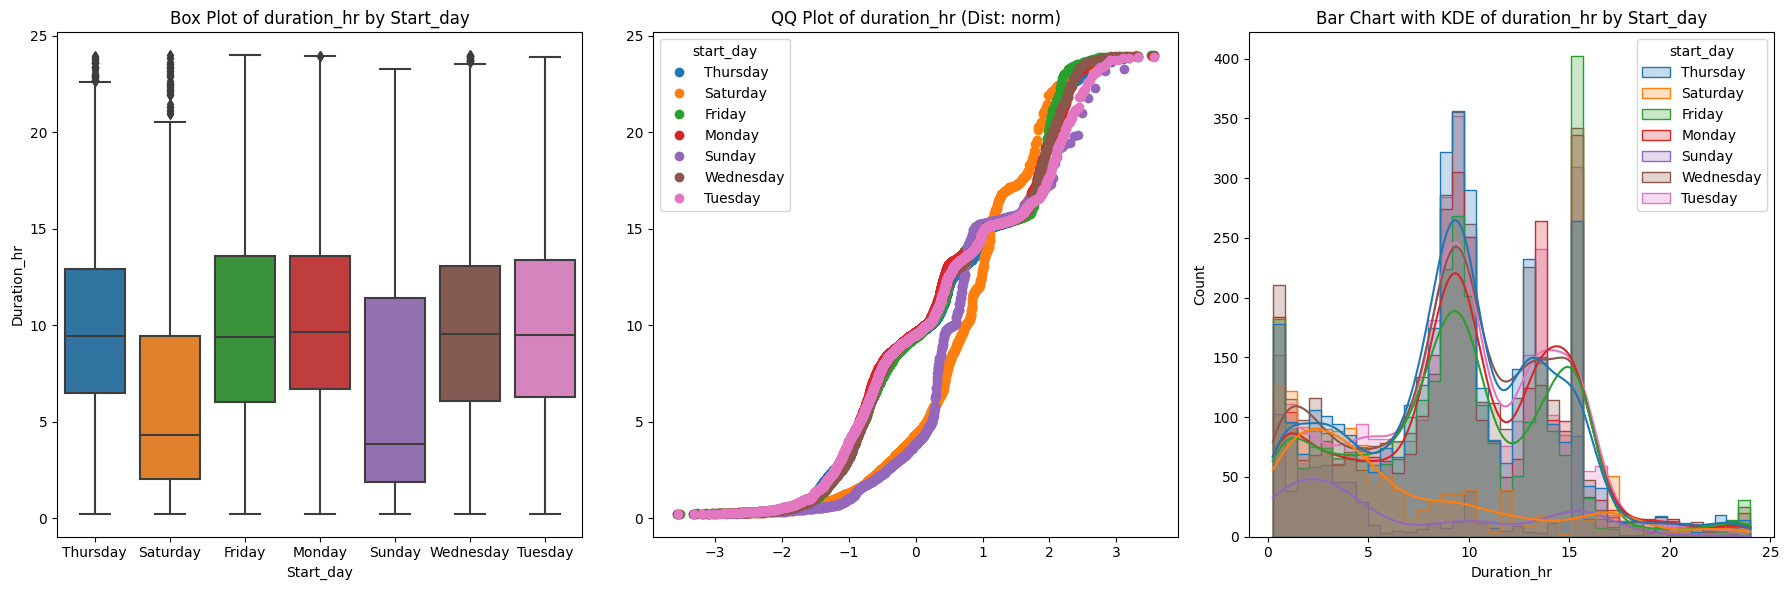

In [ ]:
plot_ev_distribution(df, "duration_hr", "start_day", qqplot=True)

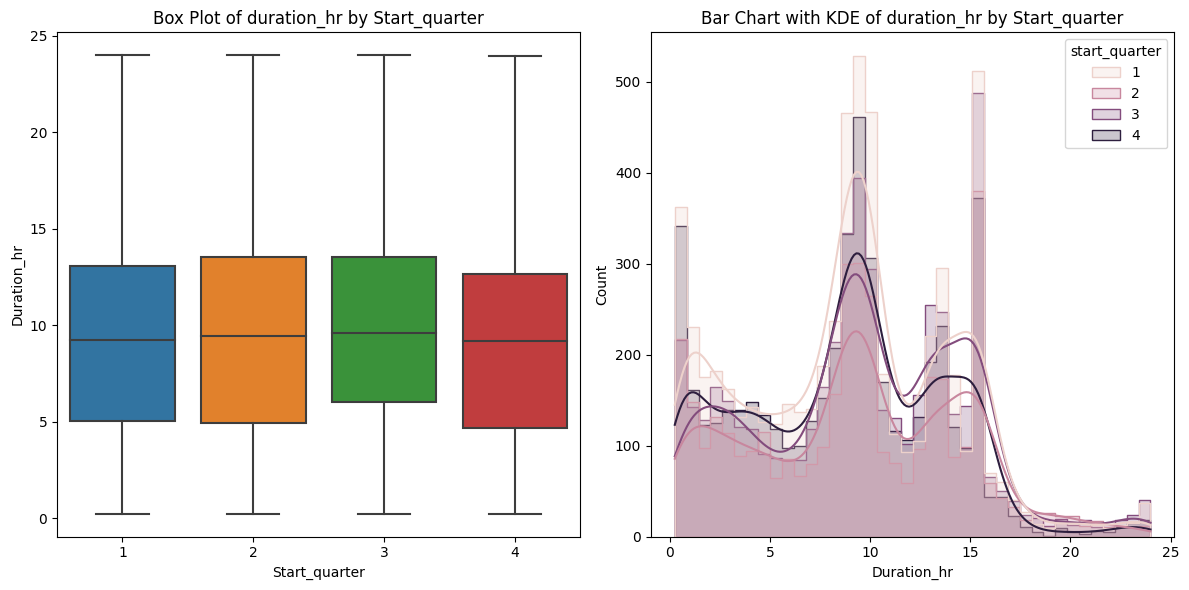

In [ ]:
plot_ev_distribution(df, "duration_hr", "start_quarter")

We can see that the duration hour have a similar distribution.  
This means that seasonality probably don't affect stay duration that much.  

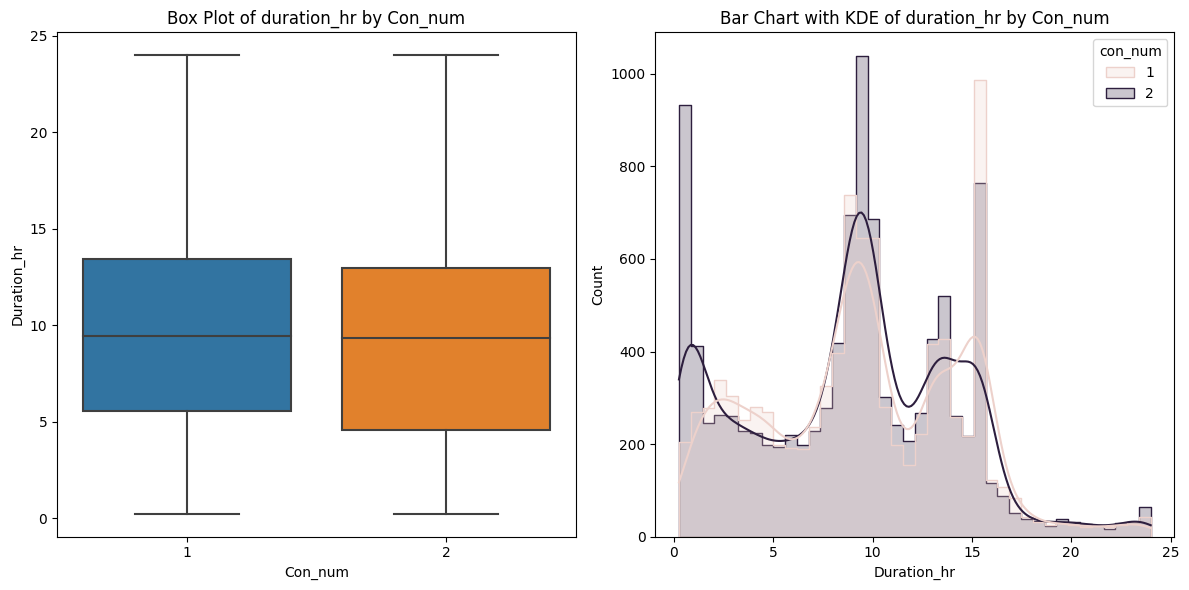

In [ ]:
plot_ev_distribution(df, "duration_hr", "con_num")

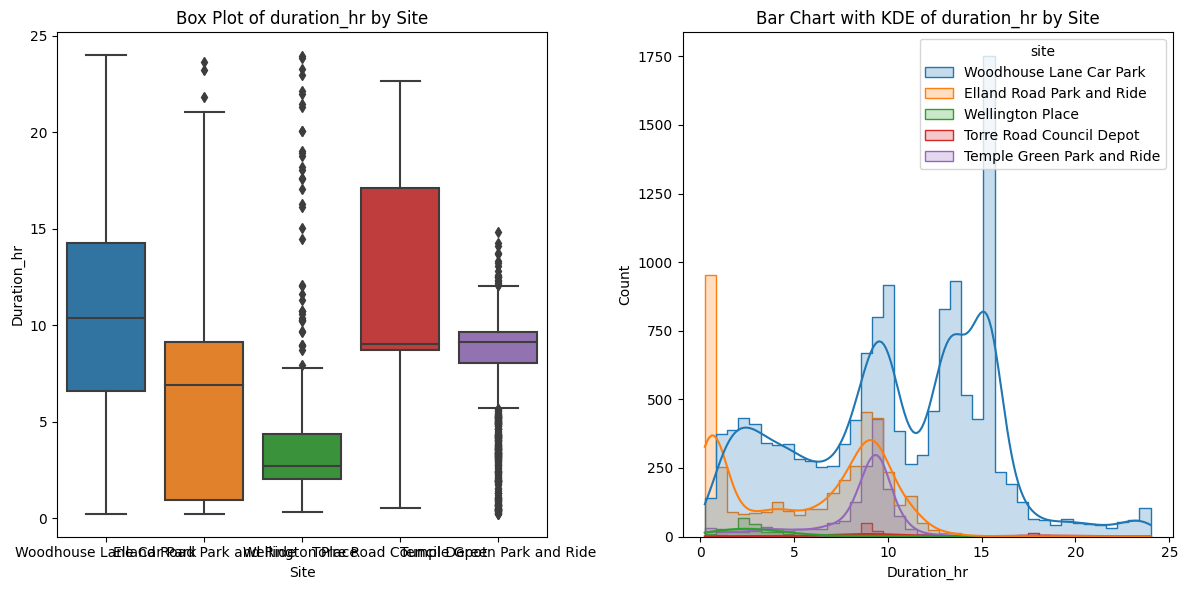

In [ ]:
plot_ev_distribution(df, "duration_hr", "site")

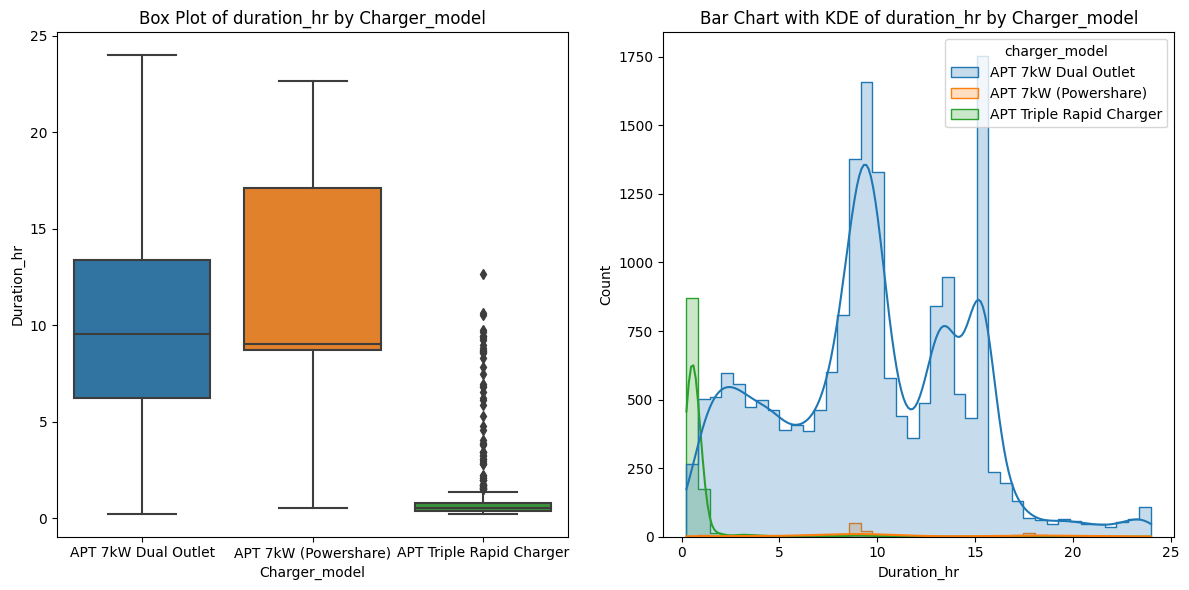

In [ ]:
plot_ev_distribution(df, "duration_hr", "charger_model")

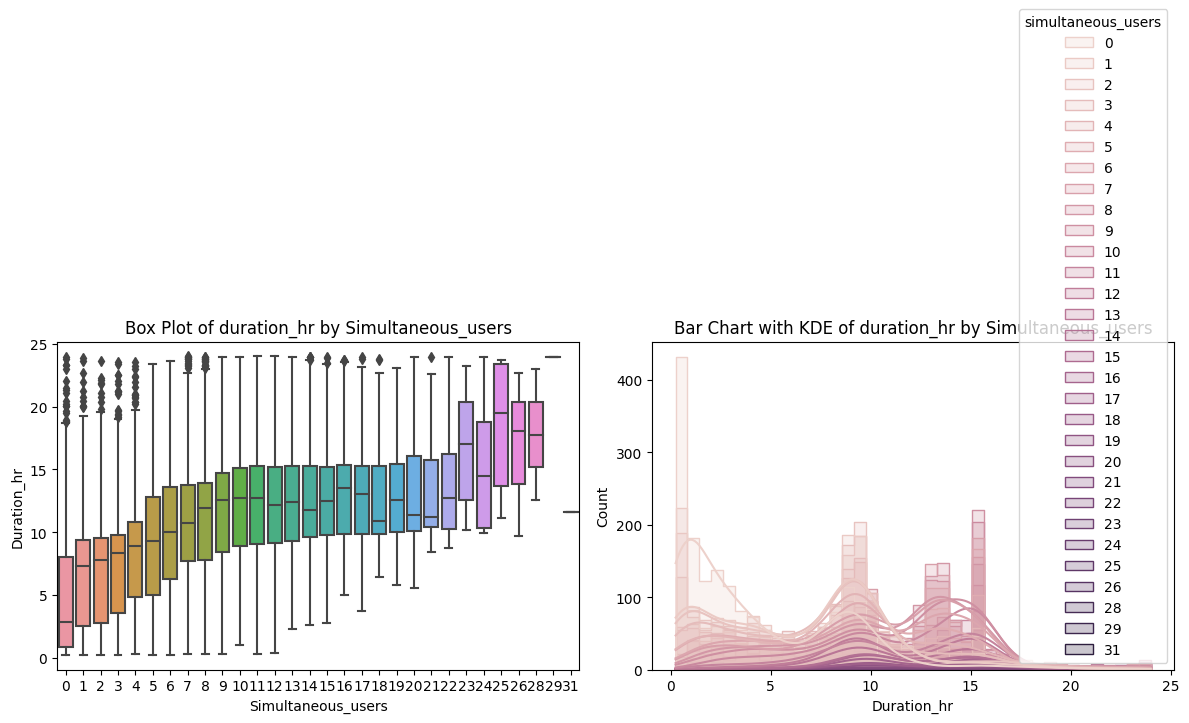

In [ ]:
plot_ev_distribution(df, "duration_hr", "simultaneous_users")

The higher the number of simultaneouys users, the longer the likely duration of stay.

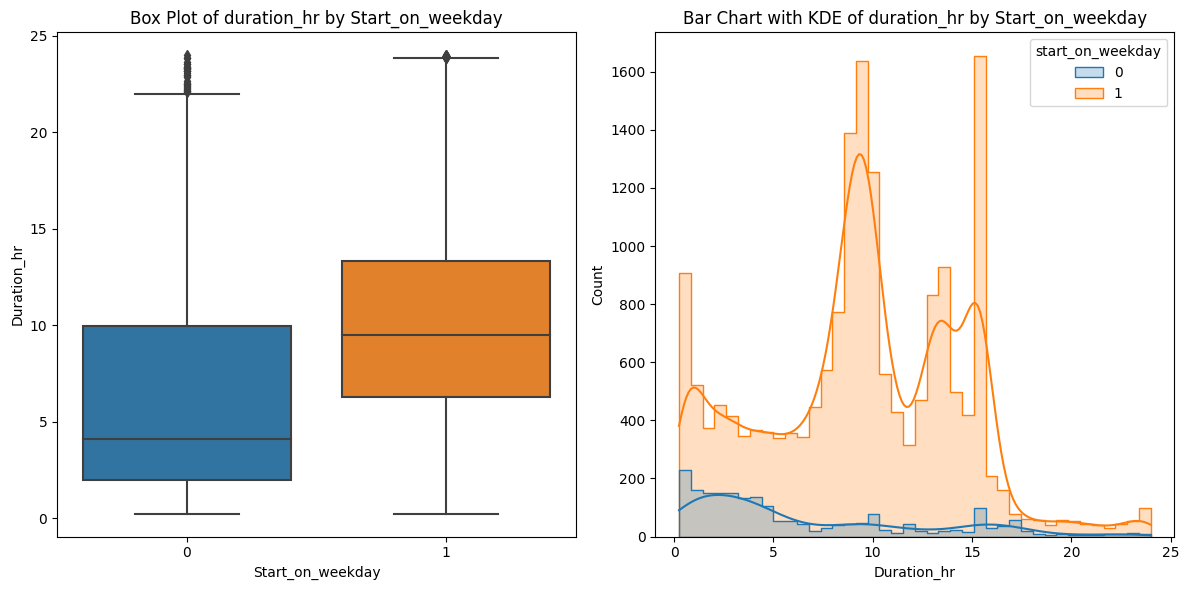

In [ ]:
plot_ev_distribution(df, "duration_hr", "start_on_weekday")

Weekend and weekday shows very different charging behaviour.

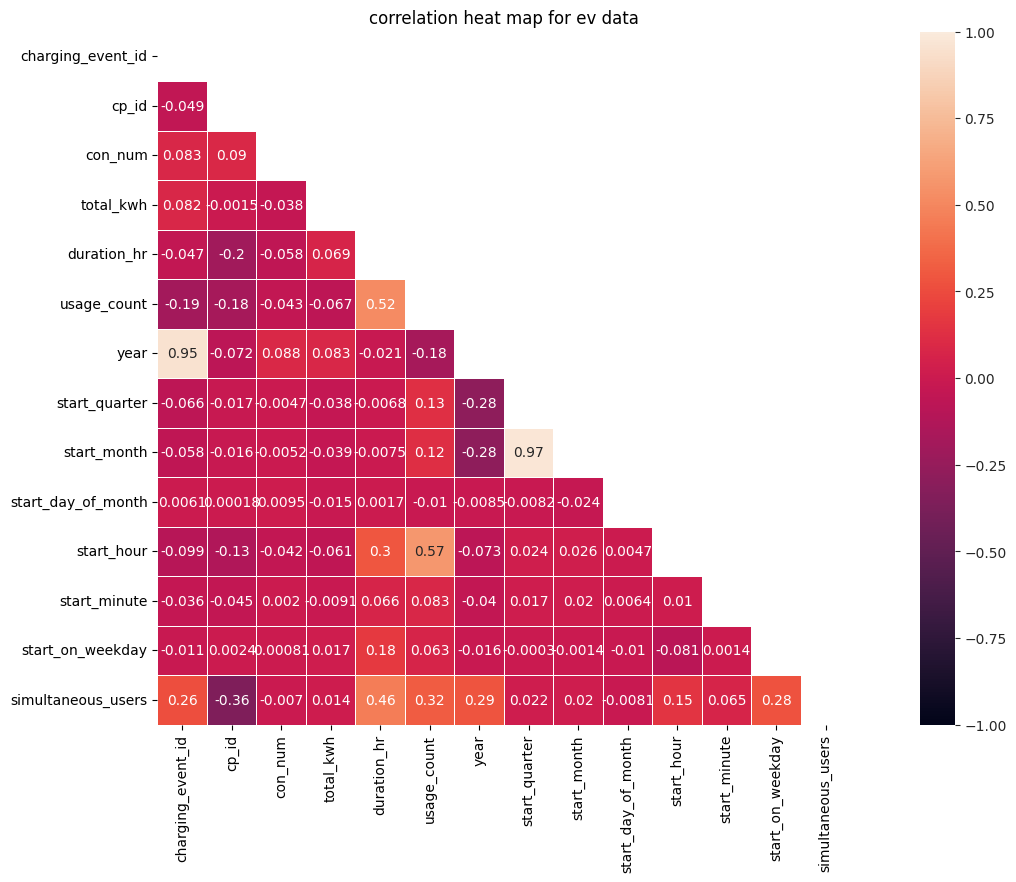

In [ ]:
plt.figure(figsize = (18,9))
plt.title("correlation heat map for ev data")
# Get correlation of variables that will be available when EV arrive.
columns_to_drop = ['end_date',	'end_time', 'total_kwh', 'end_datetime',
                   	'end_day',	'end_period']
corr = df.corr(numeric_only=True)
# Set up mask to be “True” in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

We are not interested in data of other smaller charging stations.  
We should look at EV at 'Woodhouse Lane Car Park' only!   
Let us remove the other data and check the distribution again.

# Modelling to predict "duration_hr"

In [ ]:
# Standard Library Imports
import os

# Data Processing and Modeling
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from xgboost import XGBRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

# Third-party utilities
from google.colab import drive, files
import joblib as joblib

In [ ]:
# Mount drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/My Drive/joblib"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


In [ ]:
# !pip uninstall xgboost -y
# %cd "/content/drive/My Drive/joblib"
# !pip install xgboost-2.0.1-py3-none-manylinux2014_x86_64.whl

This section focus on the modelling for the prediction of "duration_hr", for EVs at the 'Woodhouse Lane Car Park'.  
We are not interested in data of other smaller charging stations.  
The reasons are:   
1. Small sample size  
2. Prone to outliers  

Let us drop them.  
Also, we should drop end time.  
This is because we should not know the end time when we are actually trying to predict the duration of stay.  

In [ ]:
woodhouse_df = df.loc[df['site'] == 'Woodhouse Lane Car Park'].reset_index(drop=True).copy()
woodhouse_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,usage_count,year,start_quarter,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday,simultaneous_users
0,233978,14Q2User 15,70204,2,2014-04-10,07:41,2014-04-10,17:12,5.63,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-10 07:41:00,2014-04-10 17:12:00,9.516667,Thursday,Thursday,morning,afternoon,3,2014,2,4,10,7,41,1,0
1,234600,14Q2User 15,70204,2,2014-04-12,11:55,2014-04-12,21:12,5.39,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-12 11:55:00,2014-04-12 21:12:00,9.283333,Saturday,Saturday,morning,evening,3,2014,2,4,12,11,55,0,0
2,236159,14Q2User 15,70204,2,2014-04-18,08:41,2014-04-18,18:11,4.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-18 08:41:00,2014-04-18 18:11:00,9.500000,Friday,Friday,morning,evening,3,2014,2,4,18,8,41,1,0
3,243232,14Q2User 11,70202,1,2014-05-10,10:18,2014-05-10,11:04,1.26,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-10 10:18:00,2014-05-10 11:04:00,0.766667,Saturday,Saturday,morning,morning,2,2014,2,5,10,10,18,0,0
4,243750,14Q2User 17,70202,1,2014-05-12,15:55,2014-05-12,17:27,5.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-12 15:55:00,2014-05-12 17:27:00,1.533333,Monday,Monday,afternoon,afternoon,1,2014,2,5,12,15,55,1,0


In [ ]:
columns_to_drop = ['charging_event_id',	'user_id',	'cp_id',	'con_num',
                   'start_date',	'start_time',	'end_date',	'end_time',	'year',
                   'total_kwh',	'site',	'start_datetime',	'end_datetime',
                   'start_period', 'start_quarter',	'end_day',	'end_period']
woodhouse_drop_df = woodhouse_df.drop(columns=columns_to_drop)
woodhouse_drop_df.head()

,charger_model,duration_hr,start_day,usage_count,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday,simultaneous_users
0,APT 7kW Dual Outlet,9.516667,Thursday,3,4,10,7,41,1,0
1,APT 7kW Dual Outlet,9.283333,Saturday,3,4,12,11,55,0,0
2,APT 7kW Dual Outlet,9.500000,Friday,3,4,18,8,41,1,0
3,APT 7kW Dual Outlet,0.766667,Saturday,2,5,10,10,18,0,0
4,APT 7kW Dual Outlet,1.533333,Monday,1,5,12,15,55,1,0


### Label encoding of features
----
Some features need to be label encoded 1st.
Such as the start day.  

In [ ]:
# Encoding categorical variables
label_encoders = {}
encoding_mapping = {}
for column in woodhouse_drop_df.select_dtypes(include=["object", "category"]).columns:
    le = LabelEncoder()
    woodhouse_drop_df[column] = le.fit_transform(woodhouse_drop_df[column])
    label_encoders[column] = le

    # Save the mapping relation of each label encoder
    label_mapping = {original: encoded for encoded, original in enumerate(le.classes_)}
    encoding_mapping[column] = label_mapping

woodhouse_drop_df.head()

,charger_model,duration_hr,start_day,usage_count,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday,simultaneous_users
0,0,9.516667,4,3,4,10,7,41,1,0
1,0,9.283333,2,3,4,12,11,55,0,0
2,0,9.500000,0,3,4,18,8,41,1,0
3,0,0.766667,2,2,5,10,10,18,0,0
4,0,1.533333,1,1,5,12,15,55,1,0


In [ ]:
encoding_mapping

{'charger_model': {'APT 7kW Dual Outlet': 0},
 'start_day': {'Friday': 0,
  'Monday': 1,
  'Saturday': 2,
  'Sunday': 3,
  'Thursday': 4,
  'Tuesday': 5,
  'Wednesday': 6}}

In [ ]:
# Drop charger_model as this site is using the same charger model.
# If site have more than 1 charger model, then it should not be droppped.
woodhouse_drop_df.drop(columns=['charger_model'], inplace=True)
woodhouse_drop_df.head()

,duration_hr,start_day,usage_count,start_month,start_day_of_month,start_hour,start_minute,start_on_weekday,simultaneous_users
0,9.516667,4,3,4,10,7,41,1,0
1,9.283333,2,3,4,12,11,55,0,0
2,9.500000,0,3,4,18,8,41,1,0
3,0.766667,2,2,5,10,10,18,0,0
4,1.533333,1,1,5,12,15,55,1,0


### Cyclic nature of time related features
----
When considering features like `start_hour` and `start_minute` for a predictive model like XGBoost, it's essential to think about the nature of these variables and how they might relate to my target variable (duration_hr in this case).

Time stamps like `start_hour` and `start_minute` are inherently numerical.   
They represent a specific point in time (hours and minutes of the day) and have a quantitative value. For example, 15:30 (3:30 PM) is quantitatively later in the day than 09:45 (9:45 AM).

Although these features are numerical, they are also cyclical. This means that after 23 hr, the cycle starts again at 00 hr.   
This cyclical nature isn't naturally captured by typical numerical representations.    
If I treat them as purely ordinal or continuous, the model might misunderstand the relationship between 23 hr & 01 min and 00 hr & 01 min as the same as between 23 hr & 01 min and 01 hr & 01 min, which is not the case.  


To capture this cyclical nature, I can transform these features into two dimensions using sine and cosine transformations.

For models like XGBoost, these engineered features (hour_sin, hour_cos, minute_sin, minute_cos) can be more informative and offer a better understanding of the cyclical time patterns, which might be crucial in predicting the duration of stay.

If I keep start_hour and start_minute as they are (numerical without transformation), the model may still learn some useful patterns, but it might not fully grasp the cyclical nature of time.  

In [ ]:
def convert_ordinal_2_cyclic(df, **kwargs):
  for kw, arg in kwargs.items():
    df[f"{kw}_sin"] = np.sin(2 * np.pi * df[kw]/arg)
    df[f"{kw}_cos"] = np.cos(2 * np.pi * df[kw]/arg)
    df.drop(columns=[kw], inplace=True)
  return df


In [ ]:
woodhouse_prep_df = convert_ordinal_2_cyclic(woodhouse_drop_df, start_day=7, start_month=12, start_day_of_month=31, start_hour=24, start_minute=60)
woodhouse_prep_df.head()

,duration_hr,usage_count,start_on_weekday,simultaneous_users,start_day_sin,start_day_cos,start_month_sin,start_month_cos,start_day_of_month_sin,start_day_of_month_cos,start_hour_sin,start_hour_cos,start_minute_sin,start_minute_cos
0,9.516667,3,1,0,-0.433884,-0.900969,0.866025,-0.500000,0.897805,-0.440394,0.965926,-0.258819,-0.913545,-0.406737
1,9.283333,3,0,0,0.974928,-0.222521,0.866025,-0.500000,0.651372,-0.758758,0.258819,-0.965926,-0.500000,0.866025
2,9.500000,3,1,0,0.000000,1.000000,0.866025,-0.500000,-0.485302,-0.874347,0.866025,-0.500000,-0.913545,-0.406737
3,0.766667,2,0,0,0.974928,-0.222521,0.500000,-0.866025,0.897805,-0.440394,0.500000,-0.866025,0.951057,-0.309017
4,1.533333,1,1,0,0.781831,0.623490,0.500000,-0.866025,0.651372,-0.758758,-0.707107,-0.707107,-0.500000,0.866025


In [ ]:
woodhouse_prep_df.shape

(14007, 14)

In [ ]:
def calculate_metrics(y_test, y_pred):
  # Calculating the error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print(f"Root Mean Squared Error: {rmse}")

  # Calculating MAE
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error: {mae}")

  # Calculating R-squared
  r_squared = r2_score(y_test, y_pred)
  print(f"R-squared: {r_squared}")

In [ ]:
def plot_model_diagnostics(y_test, y_pred):
    # Calculating residuals
    residuals = y_test - y_pred

    # Creating subplots
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    # Scatter plot for actual vs. predicted values
    sns.scatterplot(x=y_test, y=y_pred, ax=axs[0])
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    axs[0].set_xlabel('Actual')
    axs[0].set_ylabel('Predicted')
    axs[0].set_title('Actual vs. Predicted')

    # Residuals plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs[1])
    axs[1].hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title('Residuals vs. Predicted')

    # Showing the plots
    plt.tight_layout()
    plt.show()

    # Histogram of the residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

In [ ]:
# Splitting the data into features and target
X = woodhouse_prep_df.drop('duration_hr', axis=1)
y = woodhouse_prep_df['duration_hr']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the XGBRegressor and grid search parameters
xgb_params = {
    'xgbregressor__n_estimators': [360, 370, 380],
    'xgbregressor__max_depth': [28, 29, 30],
    'xgbregressor__learning_rate': [0.01, 0.02],
    'xgbregressor__colsample_bynode': [0.1, 0.2],
}

# Creating the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(XGBRegressor(random_state=42))),
    ('xgbregressor', XGBRegressor(random_state=42))
])

In [ ]:
### Warning: This code take very long time to run!####
# Grid Search with Cross-Validation
# grid_search = GridSearchCV(pipeline, xgb_params, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Best model after grid search
# best_model = grid_search.best_estimator_

# # Displaying best parameters
# print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Load model from drive to colab
%cd /content/drive/MyDrive/joblib

best_model = joblib.load('best_naive_xgb.joblib')

/content/drive/MyDrive/joblib


In [ ]:
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model.predict(X_train)
calculate_metrics(y_train, y_pred_train)

----------Metrics for pred data-----------
Mean Squared Error: 13.278211276816984
Root Mean Squared Error: 3.6439280010473567
Mean Absolute Error: 2.2645210384897125
R-squared: 0.4691697552230767
----------Fit Train data------------------
Mean Squared Error: 9.324248369871464
Root Mean Squared Error: 3.053563225130841
Mean Absolute Error: 1.9271538225100473
R-squared: 0.6400795745890604


### Overfitted
This shows that my current model faced a situation of over fitting.  
This is a common problem with decision tree based ensemble learners.  
I should reduce my model complexity to let the model become more generalised.  
There are 3 things I can do:
1. Tune the hyper parameters to make it more generalised.  
2. Make the dimension of the model smaller, by using PCA or t-SNE.  
3. Stratify my training and testing set.

Number 3 is the easiest to do.  
Let us do that 1st.  


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['start_on_weekday'])

# Defining the XGBRegressor and grid search parameters
xgb_params = {
    'xgbregressor__n_estimators': [370],
    'xgbregressor__max_depth': [29],
    'xgbregressor__learning_rate': [0.01],
    'xgbregressor__colsample_bynode': [0.1],
}

# Creating the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(XGBRegressor(random_state=42))),
    ('xgbregressor', XGBRegressor(random_state=42))
])

In [ ]:
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model.predict(X_train)
calculate_metrics(y_train, y_pred_train)

----------Metrics for pred data-----------
Mean Squared Error: 9.810506399443964
Root Mean Squared Error: 3.1321727920796394
Mean Absolute Error: 1.9542621555482662
R-squared: 0.6127609958542027
----------Fit Train data------------------
Mean Squared Error: 10.191406697974918
Root Mean Squared Error: 3.1923982674432896
Mean Absolute Error: 2.0047393102389126
R-squared: 0.6054282021036994


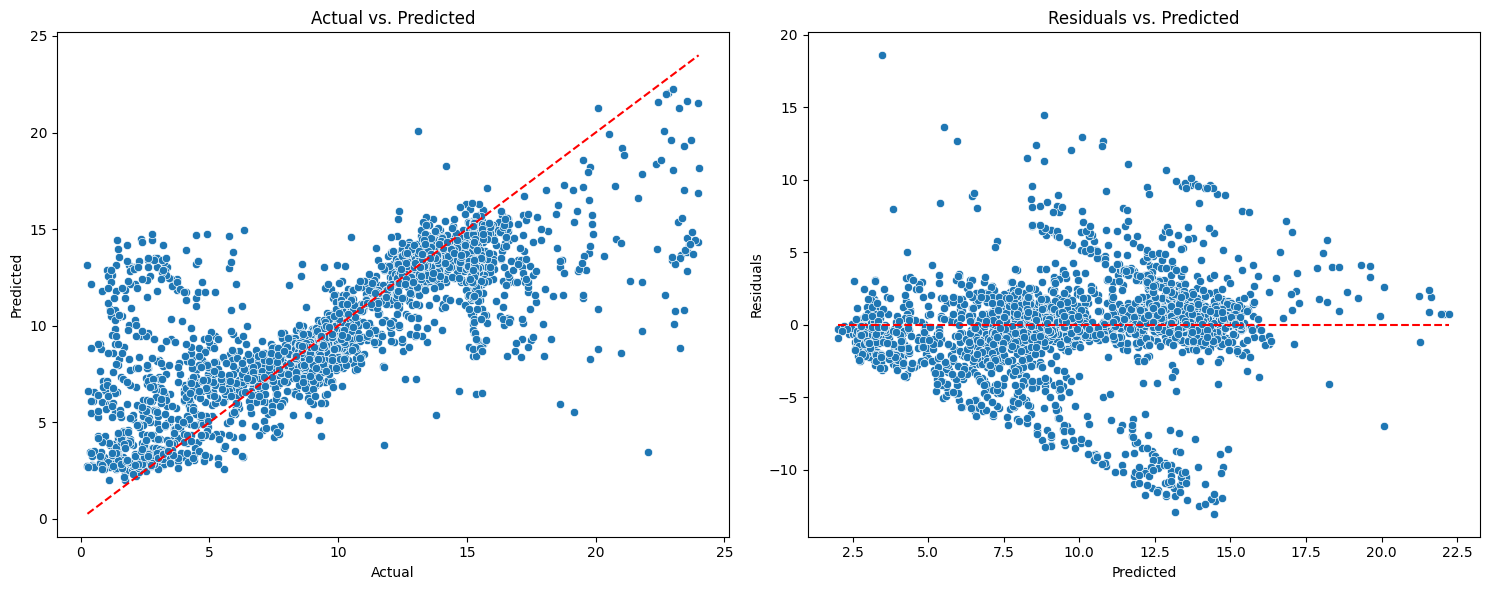

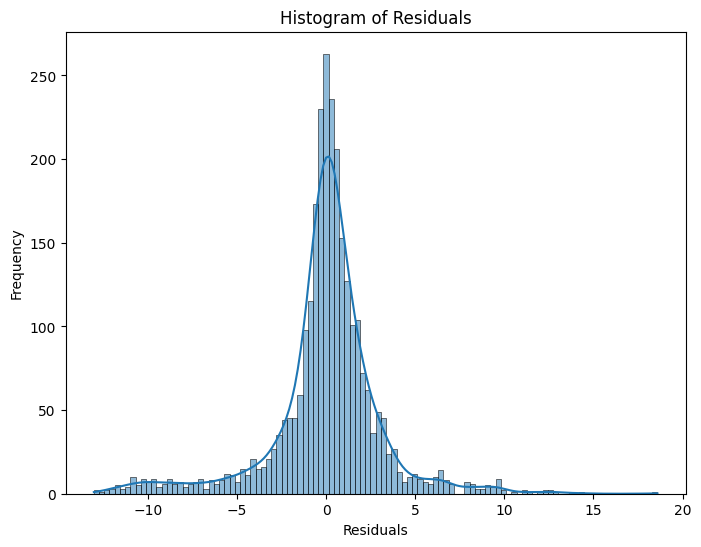

In [ ]:
# Call the function
plot_model_diagnostics(y_test, y_pred)

Using the old model but updated X_train and y_train, the result is pretty good.  
This shows that the issue lies with data used for testing being very different from data used in training.   
We should stratify our data, which we just did, and retrain the model with the new stratefied X_train and y_train.  

-----
This is training a new model with different hyper parameters.

In [ ]:
# Grid Search with Cross-Validation
strat_grid_search = GridSearchCV(pipeline, xgb_params, cv=5, scoring='neg_mean_squared_error')
strat_grid_search.fit(X_train, y_train)

# Best model after grid search
stratified_model = strat_grid_search.best_estimator_

# Displaying best parameters
print("Best Parameters:", strat_grid_search.best_params_)

Best Parameters: {'xgbregressor__colsample_bynode': 0.1, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 29, 'xgbregressor__n_estimators': 370}


In [ ]:
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = stratified_model.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = stratified_model.predict(X_train)
calculate_metrics(y_train, y_pred_train)

----------Metrics for pred data-----------
Mean Squared Error: 12.417122073556081
Root Mean Squared Error: 3.5237937047386985
Mean Absolute Error: 2.247469083394376
R-squared: 0.5098730085540557
----------Fit Train data------------------
Mean Squared Error: 9.68459488081126
Root Mean Squared Error: 3.1120081749268045
Mean Absolute Error: 1.983939588472422
R-squared: 0.6250499928750451


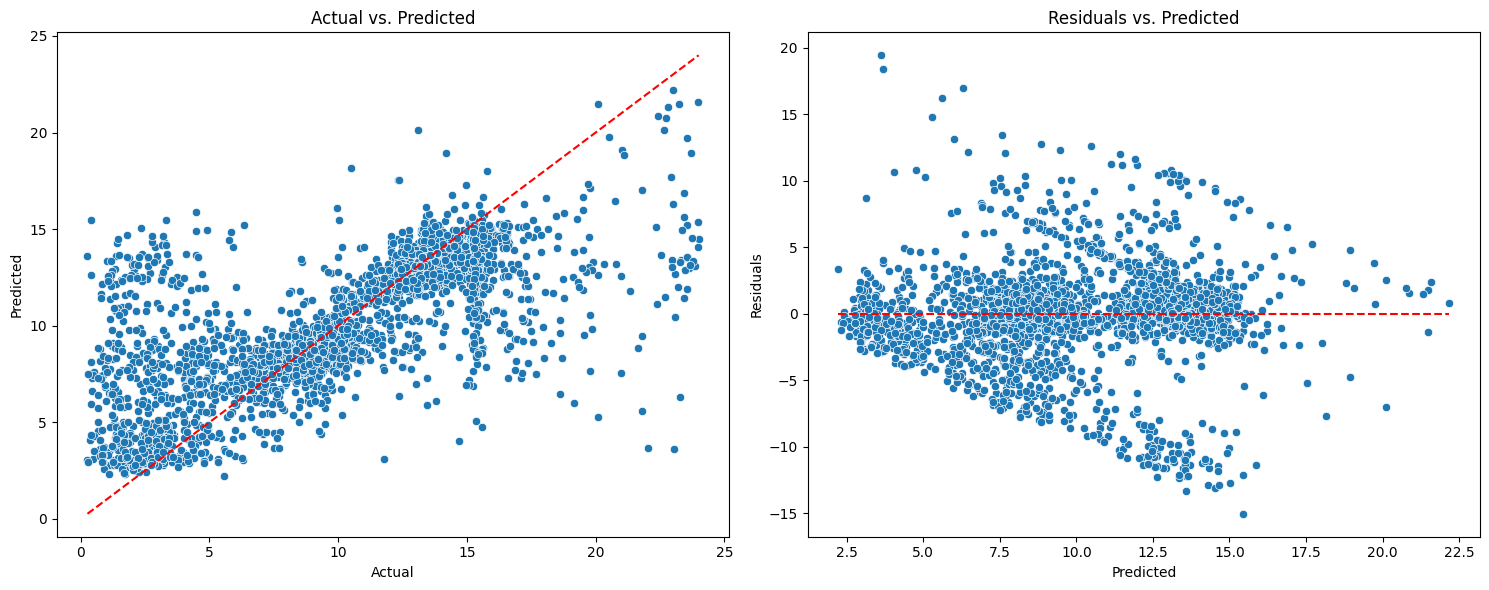

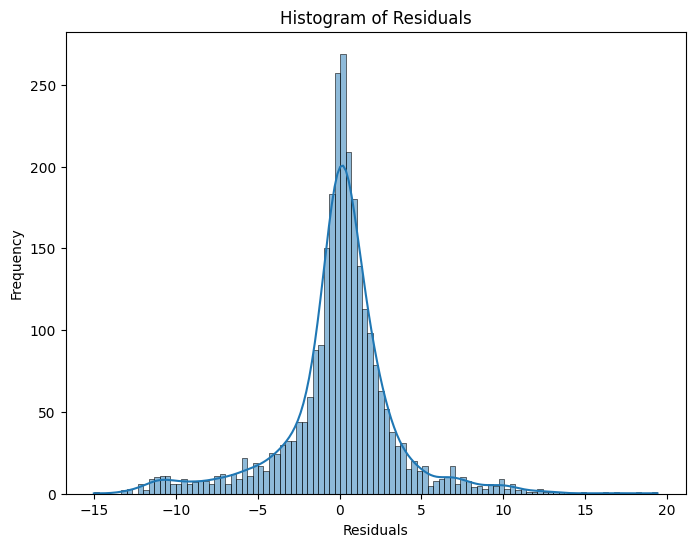

In [ ]:
# Call the function
plot_model_diagnostics(y_test, y_pred)

In [ ]:
path_to_save = "/content/drive/My Drive/joblib/stratified_xgb.joblib"
joblib.dump(stratified_model, path_to_save)

['/content/drive/My Drive/joblib/stratified_xgb.joblib']

In [ ]:
# Load model from drive to colab
%cd /content/drive/MyDrive/joblib

stratified_model = joblib.load('stratified_xgb.joblib')

/content/drive/MyDrive/joblib


Result isn't as good as the old model, trained on unstratified randomised data.  
However, there's still an remarkable increase in test metrics for unseen data.
We will skip hyperparameter tunning again.   
It simply takes too ling time.   

-----
### PCA
Next we can do PCA or t-SNE.  
t-SNE is typically used for vidualisation.  
So I will use PCA, Principle Component Analysis.  
Which is basically finding orthogonal vectors with

In [ ]:
# Define pipeline with PCA and XGBRegressor
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('xgb', XGBRegressor(random_state=42))
])

In [ ]:
# ####### Warning takes very long time to run############
# # Parameters for grid search
# # Note: 'dim_reduction__n_components' is for PCA
# # Adjust parameters accordingly if you want to add more tuning options
# params = {
#     'dim_reduction__n_components': [2, 5, 10],
#     'xgb__n_estimators': [370, 350],
#     'xgb__max_depth': [30, 25],
#     'xgb__learning_rate': [0.01],
#     'xgb__colsample_bynode': [0.2],
# }

# # Grid search with cross-validation
# grid_search_w_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
# grid_search_w_pca.fit(X_train, y_train)

# # Print best parameters
# print("Best parameters found: ", grid_search_w_pca.best_params_)

# # Evaluate on test set
# score = grid_search_w_pca.score(X_test, y_test)
# print("Test set score with best parameters: ", score)


In [ ]:
# # Best model after grid search
# best_model_w_pca = grid_search_w_pca.best_estimator_

In [ ]:
# path_to_save = "/content/drive/My Drive/joblib/pca_xgb_1.joblib"
# joblib.dump(best_model_w_pca, path_to_save)

In [ ]:
# Load model from drive to colab
%cd /content/drive/MyDrive/joblib

best_model_w_pca = joblib.load('pca_xgb_1.joblib')

/content/drive/MyDrive/joblib


In [ ]:
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

----------Metrics for pred data-----------
Mean Squared Error: 13.204633601130618
Root Mean Squared Error: 3.633818047334046
Mean Absolute Error: 2.50653241376153
R-squared: 0.47878845824902927
----------Fit Train data------------------
Mean Squared Error: 0.16011935662656382
Root Mean Squared Error: 0.4001491679693509
Mean Absolute Error: 0.25045324812470204
R-squared: 0.9938007986243257


Wow, very bad over fit.  

----
### Tune model with PCA

Need to recduce the variance and increase the bias for model.   
It is over fitting very badly.   

In [ ]:
params = {
    'dim_reduction__n_components': [13],
    'xgb__n_estimators': [100],  # Decreased this
    'xgb__max_depth': [10],  # Decreased this
    'xgb__learning_rate': [0.1],  # Decreased this
    'xgb__colsample_bynode': [0.6],  # Adjusted this
    'xgb__subsample': [0.8],  # Added this
    'xgb__gamma': [0.1],  # Added this
    'xgb__alpha': [0.1],  # Added this
    'xgb__lambda': [1]  # Added this
}

# Grid search with cross-validation
grid_search_w_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search_w_pca.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search_w_pca.best_params_)
# Best model after grid search
best_model_w_pca = grid_search_w_pca.best_estimator_
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.1, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.1, 'xgb__lambda': 1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
----------Metrics for pred data-----------
Mean Squared Error: 12.708588379175605
Root Mean Squared Error: 3.564910711248685
Mean Absolute Error: 2.2972241134834155
R-squared: 0.4983682892934316
----------Fit Train data------------------
Mean Squared Error: 1.1248566266632947
Root Mean Squared Error: 1.0605925827872336
Mean Absolute Error: 0.7224814620511651
R-squared: 0.9564499077790413


In [ ]:
params = {
    'dim_reduction__n_components': [13],
    'xgb__n_estimators': [50],  # Decreased this
    'xgb__max_depth': [6],  # Decreased this
    'xgb__learning_rate': [0.1],  # Decreased this
    'xgb__colsample_bynode': [0.6],  # Adjusted this
    'xgb__subsample': [0.8],  # Added this
    'xgb__gamma': [0.1],  # Added this
    'xgb__alpha': [0.1],  # Added this
    'xgb__lambda': [1]  # Added this
}

# Grid search with cross-validation
grid_search_w_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search_w_pca.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search_w_pca.best_params_)
# Best model after grid search
best_model_w_pca = grid_search_w_pca.best_estimator_
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.1, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.1, 'xgb__lambda': 1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 50, 'xgb__subsample': 0.8}
----------Metrics for pred data-----------
Mean Squared Error: 12.497137237153447
Root Mean Squared Error: 3.5351290269456146
Mean Absolute Error: 2.38492751691899
R-squared: 0.5067146606557491
----------Fit Train data------------------
Mean Squared Error: 9.525283470509343
Root Mean Squared Error: 3.0863057966619807
Mean Absolute Error: 2.0911069061790535
R-squared: 0.631217913698057


In [ ]:
params = {
    'dim_reduction__n_components': [13],
    'xgb__n_estimators': [40],  # Decreased further
    'xgb__max_depth': [5],  # Decreased further
    'xgb__learning_rate': [0.05],  # Decreased this
    'xgb__colsample_bynode': [0.6],
    'xgb__subsample': [0.8],
    'xgb__gamma': [0.5],  # Increased this
    'xgb__alpha': [0.5],  # Increased this
    'xgb__lambda': [2]  # Increased this
}
# Grid search with cross-validation
grid_search_w_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search_w_pca.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search_w_pca.best_params_)
# Best model after grid search
best_model_w_pca = grid_search_w_pca.best_estimator_
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.5, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.5, 'xgb__lambda': 2, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__n_estimators': 40, 'xgb__subsample': 0.8}
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.5, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.5, 'xgb__lambda': 2, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 5, 'xgb__n_estimators': 40, 'xgb__subsample': 0.8}
----------Metrics for pred data-----------
Mean Squared Error: 13.85975308029574
Root Mean Squared Error: 3.7228689313882297
Mean Absolute Error: 2.6321932434440085
R-squared: 0.4529296692753232
----------Fit Train data------------------
Mean Squared Error: 13.253946744524761
Root Mean Squared Error: 3.640597031329444
Mean Absolute Error: 2.5666346815606587
R-squared: 0.48685851215729525


In [ ]:
params = {
    'dim_reduction__n_components': [13],
    'xgb__n_estimators': [70],  # Increase to capture more boosting rounds
    'xgb__max_depth': [6],  # Increase a bit for more depth in trees
    'xgb__learning_rate': [0.1],  # A common learning rate value
    'xgb__colsample_bynode': [0.6],
    'xgb__subsample': [0.8],
    'xgb__gamma': [0.3],  # Slightly reduced
    'xgb__alpha': [0.3],  # Slightly reduced
    'xgb__lambda': [1.5]  # Slightly reduced
}
# Grid search with cross-validation
grid_search_w_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search_w_pca.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search_w_pca.best_params_)
# Best model after grid search
best_model_w_pca = grid_search_w_pca.best_estimator_
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.3, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.3, 'xgb__lambda': 1.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 70, 'xgb__subsample': 0.8}
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.3, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.3, 'xgb__lambda': 1.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 70, 'xgb__subsample': 0.8}
----------Metrics for pred data-----------
Mean Squared Error: 12.398830382165649
Root Mean Squared Error: 3.5211972938427705
Mean Absolute Error: 2.3654358429254136
R-squared: 0.5105950157644659
----------Fit Train data------------------
Mean Squared Error: 8.656252897578927
Root Mean Squared Error: 2.9421510664102426
Mean Absolute Error: 1.9834889808411083
R-squared: 0.6648634118858726


In [ ]:
# path_to_save = "/content/drive/My Drive/joblib/final_pca_xgb.joblib"
# joblib.dump(best_model_w_pca, path_to_save)

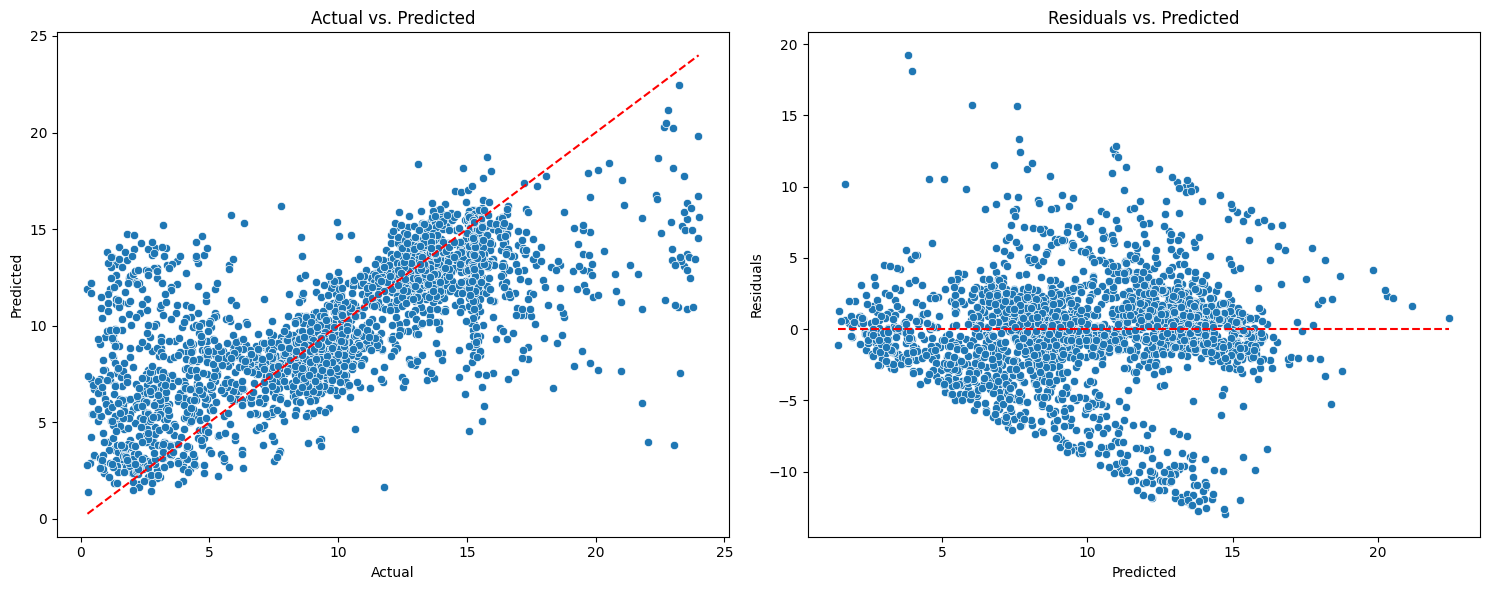

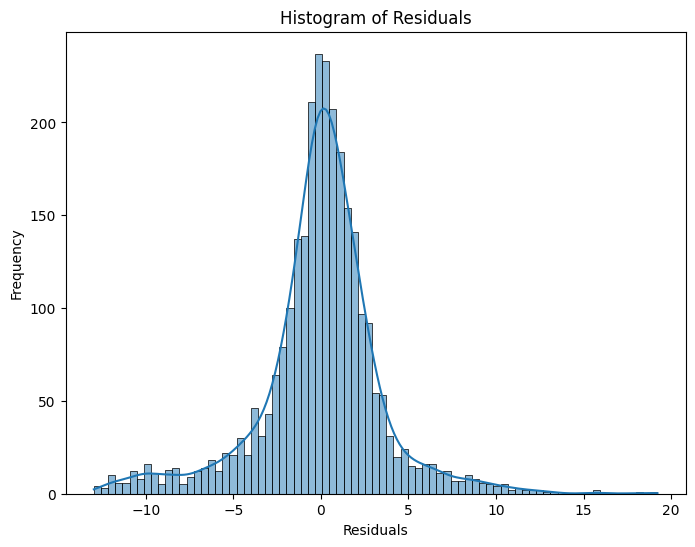

In [ ]:
# Call the function
plot_model_diagnostics(y_test, y_pred)

In [ ]:
# Load model from drive to colab
%cd /content/drive/MyDrive/joblib

final_pca_xgb = joblib.load('final_pca_xgb.joblib')

/content/drive/MyDrive/joblib


In [ ]:
# path_to_save = "/content/drive/My Drive/joblib/best_naive_xgb2.joblib"
# best_naive_xgb3 = best_model
# joblib.dump(best_naive_xgb3, path_to_save)


### Clustering with PCA then XGB

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['start_on_weekday'])

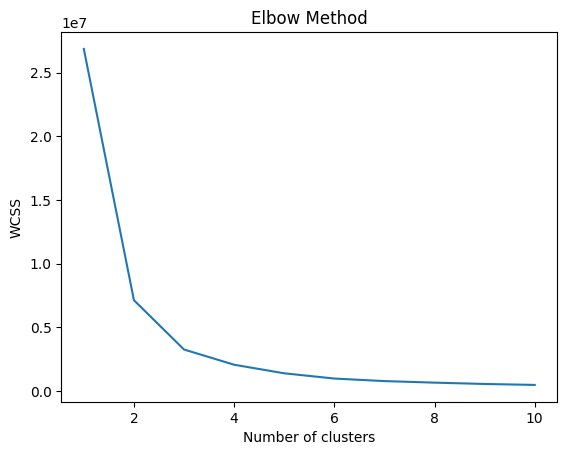

In [ ]:
# Determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method to choose K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4, n_init=10):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def transform(self, X, y=None):
        labels = self.kmeans.predict(X)
        return np.column_stack((X, labels))


In [ ]:
# Define the pipeline
pipeline = Pipeline([
    # Use ColumnTransformer to concatenate cluster labels
    ('add_cluster', ColumnTransformer([
        ("kmeans", KMeansTransformer(n_clusters=4), slice(0, X.shape[1])),
        ("passthrough", "passthrough", slice(0, X.shape[1]))
    ])),
    # Standard scaling (if needed)
    ('scaler', StandardScaler()),
    # Dimensionality reduction
    ('dim_reduction', PCA()),
    # Regressor
    ('xgb', XGBRegressor(random_state=42))
])

In [ ]:
params = {
    'dim_reduction__n_components': [13],
    'xgb__n_estimators': [70],  # Increase to capture more boosting rounds
    'xgb__max_depth': [6],  # Increase a bit for more depth in trees
    'xgb__learning_rate': [0.1],  # A common learning rate value
    'xgb__colsample_bynode': [0.6],
    'xgb__subsample': [0.8],
    'xgb__gamma': [0.3],  # Slightly reduced
    'xgb__alpha': [0.3],  # Slightly reduced
    'xgb__lambda': [1.5]  # Slightly reduced
}
# Grid search with cross-validation
grid_search_w_clus_pca = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search_w_clus_pca.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search_w_clus_pca.best_params_)
# Best model after grid search
best_model_w_clus_pca = grid_search_w_clus_pca.best_estimator_
# Predicting on test data
print("----------Metrics for pred data-----------")
y_pred = best_model_w_clus_pca.predict(X_test)
calculate_metrics(y_test, y_pred)
print("----------Fit Train data------------------")
# Look at the train data
y_pred_train = best_model_w_clus_pca.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.3, 'xgb__colsample_bynode': 0.6, 'xgb__gamma': 0.3, 'xgb__lambda': 1.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 70, 'xgb__subsample': 0.8}
----------Metrics for pred data-----------
Mean Squared Error: 12.77123319415226
Root Mean Squared Error: 3.5736862193192422
Mean Absolute Error: 2.374893207542107
R-squared: 0.495895581486235
----------Fit Train data------------------
Mean Squared Error: 8.744238578333642
Root Mean Squared Error: 2.9570658731813264
Mean Absolute Error: 1.9805887220807683
R-squared: 0.6614569470794572


In [ ]:
# Adjust parameter distributions
params_dist = {
    'dim_reduction__n_components': randint(5, 13),
    'xgb__n_estimators': randint(50, 150),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.05, 0.15),
    'xgb__colsample_bynode': uniform(0.5, 0.5),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__gamma': uniform(0, 1),
    'xgb__alpha': uniform(0, 1),
    'xgb__lambda': uniform(0, 2)
}

# Random search with cross-validation
random_search = RandomizedSearchCV(pipeline, params_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", random_search.best_params_)
# Best model after grid search
best_model_rand = random_search.best_estimator_

# Evaluate on test data
print("----------Metrics for Test Data-----------")
y_pred = best_model_rand.predict(X_test)
calculate_metrics(y_test, y_pred)

# Evaluate on train data
print("----------Fit on Train Data------------------")
y_pred_train = best_model_rand.predict(X_train)
calculate_metrics(y_train, y_pred_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'dim_reduction__n_components': 11, 'xgb__alpha': 0.7965429868602328, 'xgb__colsample_bynode': 0.5917173949330818, 'xgb__gamma': 0.7796910002727693, 'xgb__lambda': 1.193700315892974, 'xgb__learning_rate': 0.11687491292803867, 'xgb__max_depth': 9, 'xgb__n_estimators': 124, 'xgb__subsample': 0.7296244459829335}
----------Metrics for Test Data-----------
Mean Squared Error: 13.396636050706192
Root Mean Squared Error: 3.660141534245116
Mean Absolute Error: 2.4372639932768303
R-squared: 0.4712097630889698
----------Fit on Train Data------------------
Mean Squared Error: 1.5769379620434552
Root Mean Squared Error: 1.2557619049977011
Mean Absolute Error: 0.8686704391605456
R-squared: 0.9389470693012328


In [ ]:
params_dist = {
    'dim_reduction__n_components': [13],  # Fixed value
    'xgb__n_estimators': randint(70, 81),  # randint includes the lower bound and excludes the upper bound
    'xgb__max_depth': randint(4, 6),  # Exploring values 4 and 5
    'xgb__learning_rate': uniform(0.05, 0.05),  # This will sample between 0.05 and 0.1
    'xgb__colsample_bynode': uniform(0.5, 0.1),  # This will sample between 0.5 and 0.6
    'xgb__subsample': uniform(0.7, 0.1),  # This will sample between 0.7 and 0.8
    'xgb__gamma': uniform(0.3, 0.2),  # This will sample between 0.3 and 0.5
    'xgb__alpha': uniform(0.3, 0.2),  # This will sample between 0.3 and 0.5
    'xgb__lambda': uniform(1.5, 0.5)  # This will sample between 1.5 and 2.0
}

# Random search with cross-validation
random_search = RandomizedSearchCV(pipeline, params_dist, n_iter=5, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", random_search.best_params_)
# Best model after grid search
best_model_rand = random_search.best_estimator_

# Evaluate on test data
print("----------Metrics for Test Data-----------")
y_pred = best_model_rand.predict(X_test)
calculate_metrics(y_test, y_pred)

# Evaluate on train data
print("----------Fit on Train Data------------------")
y_pred_train = best_model_rand.predict(X_train)
calculate_metrics(y_train, y_pred_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'dim_reduction__n_components': 13, 'xgb__alpha': 0.47323522915498706, 'xgb__colsample_bynode': 0.5601115011743208, 'xgb__gamma': 0.44161451555920905, 'xgb__lambda': 1.5102922471479012, 'xgb__learning_rate': 0.09849549260809973, 'xgb__max_depth': 5, 'xgb__n_estimators': 75, 'xgb__subsample': 0.7000778765841014}
----------Metrics for Test Data-----------
Mean Squared Error: 12.936022546018384
Root Mean Squared Error: 3.5966682563197825
Mean Absolute Error: 2.4272833858476828
R-squared: 0.48939103810057594
----------Fit on Train Data------------------
Mean Squared Error: 10.397605323701857
Root Mean Squared Error: 3.224531799145708
Mean Absolute Error: 2.181246910171815
R-squared: 0.597444989885018


## Conslusion on modelling

We can get a decent predictive model by using the engineered data alone.  
Slight performance improvement can be made by including principle component analysis before fitting model on XGB.
Inclusion of a clustering step before PCA doesn't help with the model performance.

Additional tests we can run if we have time are testing model that does the clustering without doing PCA.

Ad of now, my current best model, as well as my recommended model is the model that does PCA and then fit using XGB.  
This gives a low RMSE of 3.5 hours.  
This means that about 68% of the predictions will have an error within ±1 RMSE.   
This makes our model usable.  
For example, we predict the car will stay for 10 hours, then we can safely assume that the car will highly likely to remain in the car park for more than 6.5 hours.    
This information can then be used to do things like optimising the charging schedule of EV, should the charging station become very busy.  